# Hierarchical clustering
## Group members - Deepali Gupta (c0832096), Riddhish  Desai (c0826982)

#### Import the libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [2]:
data = pd.read_csv("train.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

#### Select the columns E and CC

In [12]:
numerics = ['int16', 'int32', 'int64']
df = data.loc[:, ["LotArea", "SalePrice"]].fillna(method ='ffill')
df.head(4)

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000


In [13]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
normalized_df.head(3)

,0,1
0,-0.512272,0.858824
1,-0.996869,0.079070
2,0.135781,0.990739


In [14]:
x, y = normalized_df.iloc[:, 0], normalized_df.iloc[:, 1]

#### Plot the Dendogram

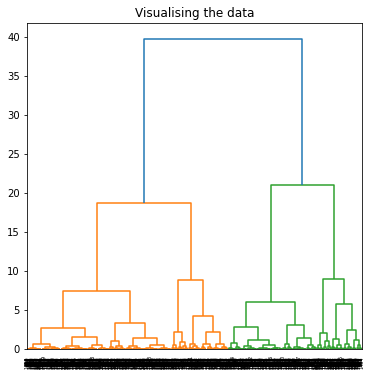

In [15]:
plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_df, method ='ward'))) 

#### Plot the scores to select the K

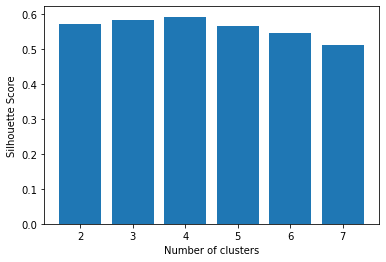

In [16]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

#### Create H model using K=4

In [17]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(normalized_df)

AgglomerativeClustering(n_clusters=4)

#### Plot the results

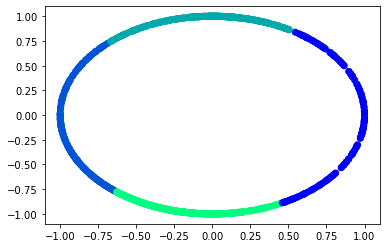

In [19]:
# Visualizing the clustering 
plt.scatter(x, y,  
           c = agg.labels_, cmap =plt.cm.winter) 
plt.show() 